In [21]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 54.9 MB/s eta 0:00:00m eta 0:00:01


In [22]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras

%matplotlib inline

# Buildin an Image Classifier Using Sequential API

In [2]:
# Will be using the Fashion MNIST dataset

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
# Creating the Validation set

# Scaling the pixels intensities down to b/w 0 and 1
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


# Class names
class_name = ["t-shirt", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "boot"]
class_name[y_train[0]]

'coat'

## Building the Model using the Sequential API

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))  # Computes X.reshape(-1,1) for each data input
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [12]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [16]:
# Training the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), verbose=0)

In [19]:
print(f"Last training accuracy {history.history['accuracy'][-1]}")
print(f"Last validation accuracy {history.history['val_accuracy'][-1]}")

Last training accuracy 0.9406909346580505
Last validation accuracy 0.8966000080108643


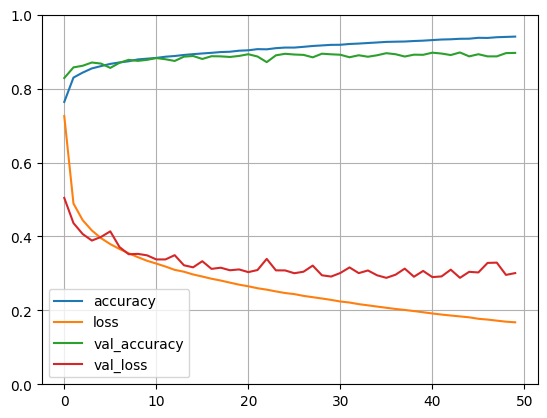

In [23]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [24]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.8439 - loss: 77.0872


[80.5304946899414, 0.8414000272750854]